Follow the steps below to calculate how much money you need to save:  
M - Enter how much you get paid:
P - Display what you entered so far
D - How much did you spend today? 
S - Get information about a stock
Q - You are done entering
Please select an optionM
Enter how much you get paid: 500
Your total is now 500.0
Follow the steps below to calculate how much money you need to save:  
M - Enter how much you get paid:
P - Display what you entered so far
D - How much did you spend today? 
S - Get information about a stock
Q - You are done entering
Please select an optionD
Enter how much you spent: 12
Your total is now 488.0
Follow the steps below to calculate how much money you need to save:  
M - Enter how much you get paid:
P - Display what you entered so far
D - How much did you spend today? 
S - Get information about a stock
Q - You are done entering
Please select an optionS
Please enter a stock symbolAMZN


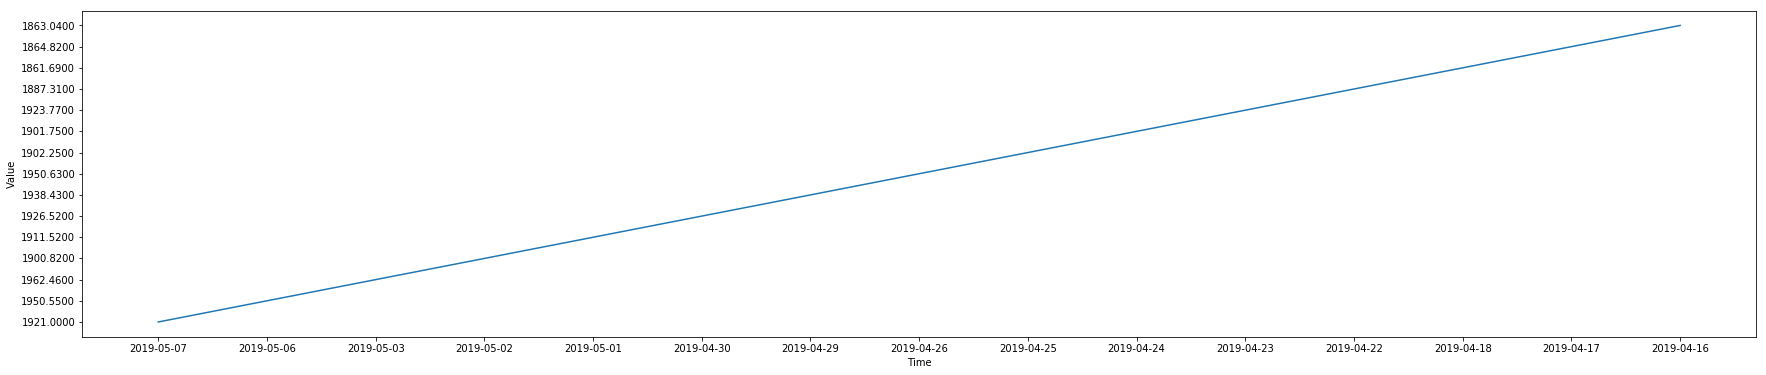

Follow the steps below to calculate how much money you need to save:  
M - Enter how much you get paid:
P - Display what you entered so far
D - How much did you spend today? 
S - Get information about a stock
Q - You are done entering
Please select an optionq
Please enter a notei need to sa'nl
Check here to reduce your spending: https://www.thesimpledollar.com/21-ways-to-reduce-your-spending-without-making-your-life-miserable/


In [4]:
import math 
import pandas as pd
import matplotlib.pyplot as plt
import requests
#payroll = int(input('Enter how much you get paid: '))
#goal_description = input('What are you saving up for? ')
#goalvalue = int(input('Enter how much do you want to save: '))
#amount = int(input('How much did you spend today?'))

#here is how the loop would occur  
#for i in goalvalue: 
    #if goalvalue < amount: 
        #print (goalvalue)
        #break

# here is how the user would input her amount
def add_money(df, money):
    while True:
        try:
            amount = float(input('Enter how much you get paid: '))
            break
        except: 
            print("Please enter a number")
    money = money + amount
    print("Your total is now", money)
    return money
    
def print_list(df):
    try:
        plt.xlabel("Time")
        plt.ylabel("Amount")
        plt.rcParams['figure.figsize'] = [30, 6]
        df[["Amount"]].plot()
        plt.show()
    except:
        print("You have nothing saved yet")

#Here is how the user would put in the amount she spent and it would be subtracted
def add_spending(df, money):
    while True:
        try:
            del_amount = float(input('Enter how much you spent: '))
            break
        except: 
            print("Please enter a number")
    money = money - del_amount
    print("Your total is now", money)
    return money

def get_stock():
    # Type in stock symbol and make the request
    symbol = input("Please enter a stock symbol")
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=" + symbol + "&apikey=1JERS7FD24CJWHT4"
    response = requests.get(url)
    data = response.json()
    # If they enter a wrong stock symbol then print out error
    if "Error Message" in data:
        print("You entered a wrong stock symbol")
    else:
        dates = []
        values = []
        # Go through the data and get the prices out
        for date, v in data["Time Series (Daily)"].items():
            dates.append(date)
            values.append(v["4. close"])
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.rcParams['figure.figsize'] = [30, 6]
        # only show the first 15% results
        plt.plot(dates[:int(len(dates)*.15)], values[:int(len(dates)*.15)])
        plt.show()

# save the data to a file to reopen again 
def save_file(df, money):
    reason = input("Please enter a note")
    # Check to see if the dataframe is empty
    if not df.empty:
        last_row = df.tail(1)
        last_money = float(last_row["Amount"].values[0])
        money = last_money + money
    # Make the pandas dataframe to put the data into
    row = pd.DataFrame({"Reason": [reason], "Amount": [money]})
    df = df.append(row, ignore_index=True)
    # Write it to file
    df.to_csv("my_expenses.csv", index = None, header=True)
        

try:
    df = pd.read_csv("my_expenses.csv")
except: 
    with open("my_expenses.csv", "w") as f:
        f.write("Amount,Reason")
    df = pd.read_csv("my_expenses.csv")
money = 0
# Run app to get user choice
while True:
    print("Follow the steps below to calculate how much money you need to save:  ")
    print("M - Enter how much you get paid:")
    print("P - Display what you entered so far")
    print("D - How much did you spend today? ")
    print("S - Get information about a stock")
    print("Q - You are done entering")
    choice = input("Please select an option").upper()
    #print ("Follow the steps below to calculate how much money you need to save: ")
    if choice == 'M':
        money = add_money(df, money)
    elif choice == 'P':
        print_list(df)
    elif choice == 'D':
        money = add_spending(df, money)
    elif choice == 'S':
        get_stock()
    elif choice == "Q":
        save_file(df, money)
        break
    else:
        print('ERROR:', choice,'is not an option')        
    
#create a new file        


#read the csv file into a dataframe
"""
import warnings
warnings.filterwarnings('ignore')



total_expense = pd.read_csv("my_expenses.csv")  P

total_expense.sample(10)


with open("my_expenses") as ifile:
    Reader = csv.DictReader(ifile)
    for row in reader:
        print(row ["user_goal"], row ["amount"], row["goal_value"])
"""
url ="https://www.thesimpledollar.com/21-ways-to-reduce-your-spending-without-making-your-life-miserable/"
print("Check here to reduce your spending:", url)


In [9]:
Q

NameError: name 'Q' is not defined